## Modelling and Evaluation Notebook

## Objective:
 * Answer business requirement 2:
    * The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.
## Inputs
* inputs/mildew_dataset/cherry-leaves/train
* inputs/mildew_dataset/cherry-leaves/test
* inputs/mildew_dataset/cherry-leaves/validation
* image shape embeddings

## Outputs
* Images distribution plot in train, validation, and test set
* Image augmentation.
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Save trained model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file

## Additional Comments
* No additional comments 

# Import packages

In [1]:
! pip install -r /workspaces/mildew-detection-in-cherry-leaves/requirements.txt

uirement already satisfied: h5py==3.1.0 in /home/codeany/.pyenv/versions/3.8.12/lib/python3.8/site-packages (from -r /workspaces/mildew-detection-in-cherry-leaves/requirements.txt (line 18)) (3.1.0)


# Set Data Directory

## Import Libraries

In [10]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Change working directory

* To change the working directory from its current folder to its parent folder
* To access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection-in-cherry-leaves/jupyter_notebooks'

**To make the parent of the current directory the new current directory**
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


**To confirm the new current directory**

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection-in-cherry-leaves'

## Set input directories
### Set train, validation, and test sets paths

In [5]:
# Set paths for train, validation, and test sets
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
validation_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directories

In [6]:
# Set output directories
version = 'v1' 
file_path =f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'): 
    print('Existing version already available create a new version')
    pass 
else:
    os.makedirs(name=file_path)

Existing version already available create a new version


### Set label names

In [7]:
# Set label names
labels = os.listdir(train_path)
print('Label for the images is', labels)

Label for the images is ['healthy', 'powdery_mildew']


---

### Set image shape

In [8]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

## Identify Number of Images in train, test, and validation data

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




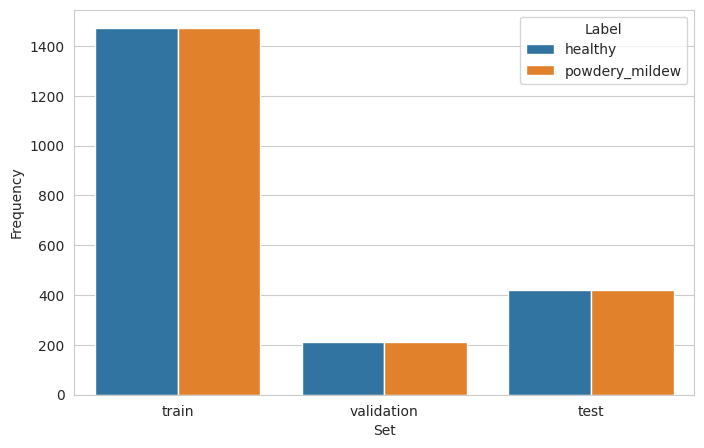

In [11]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
        ignore_index=True
    )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

# Image data augmentation
The dataset only shows a limited number of images, therefore there is a need to augment the images to increase the learning capacity of the machine learning model.

## ImageDataGenerator
### Import ImageDataGenerator form Tensorflow

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Initialize the ImageDataGenerator

In [13]:
augmented_image_data = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.12, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

## Augment training image dataset

In [14]:
batch_size = 20 # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment validation image dataset

In [16]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment test image dataset

In [17]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training images

(20, 256, 256, 3)


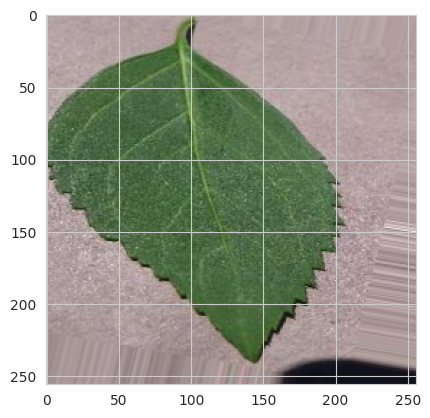

(20, 256, 256, 3)


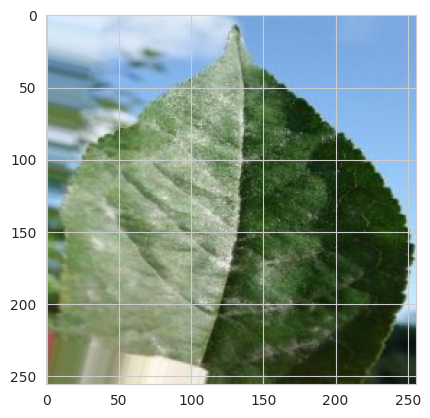

(20, 256, 256, 3)


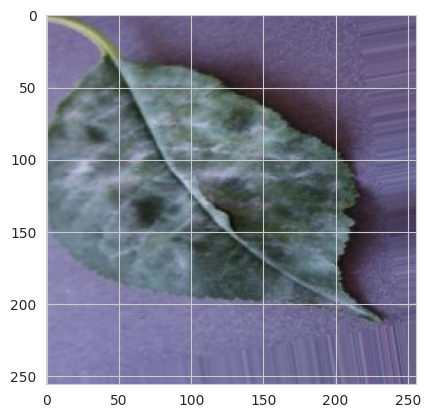

In [18]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation images

(20, 256, 256, 3)


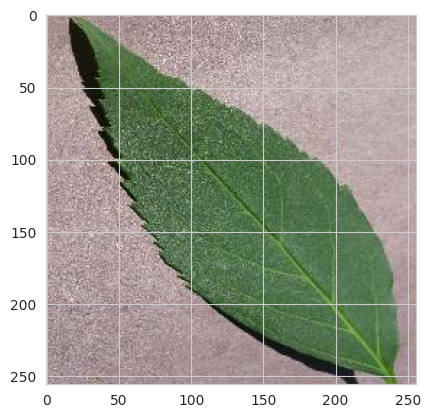

(20, 256, 256, 3)


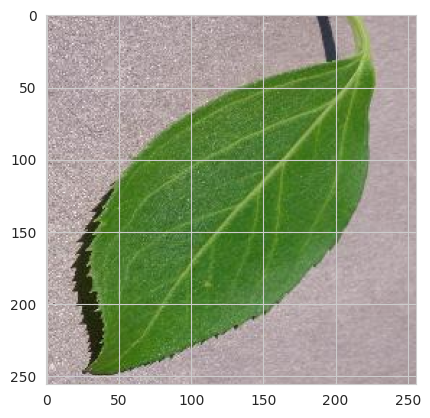

(20, 256, 256, 3)


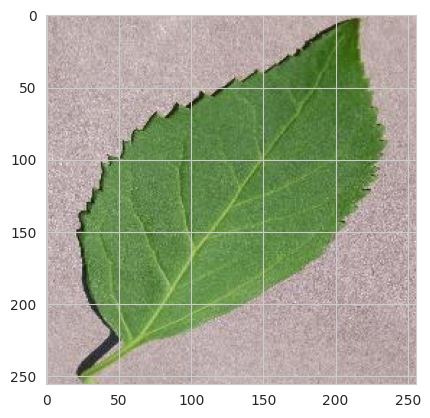

In [19]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Plot augmented test images

(20, 256, 256, 3)


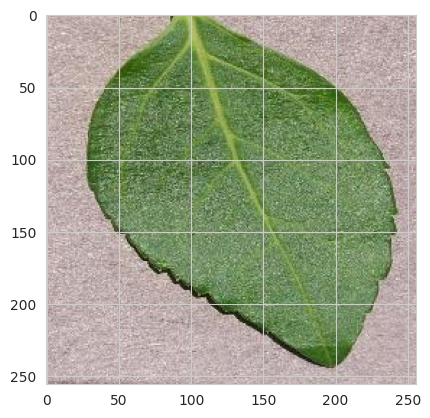

(20, 256, 256, 3)


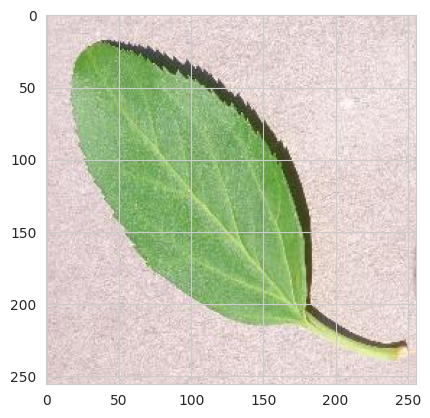

(20, 256, 256, 3)


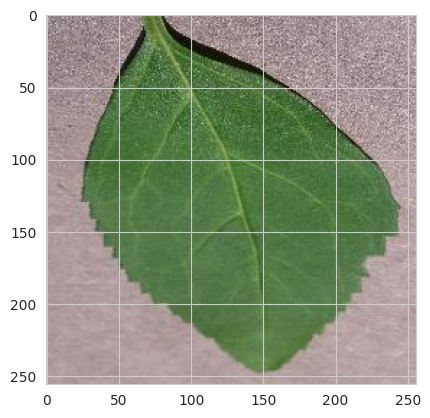

In [20]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

## Save class indices

In [22]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

# Model creation
## Create the machine learning Model

## Import model packages

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import keras_tuner
from tensorflow import keras

### Function to create model

In [22]:
# Declare a function to create model
def build_tf_model():
    """
    Convolution layers to filter the dominant pixel values from the non-dominant 
    Maxpooling then reduces the image to only the dominant pixel values 
    The outcome being the complexity is reduced and the accuracy increased
    The activation types used here are relu (rectified linerar activation function) 
    and sigmoid (logistic regression classification function)
    """ 
    # https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
    model = Sequential()
    
    # Convolution layers (filtering the dominant from non-dominant)
    model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    # Maxpooling layers (reducing image to only the dominant pixel values)
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # The Flatten layer transforms the matrix into a vector (a single list of all values)
    model.add(Flatten())
    # The Vector produced from the Flatten is fed to the Dense layer which peforms the mathematical calculation and provides the output 
    model.add(Dense(128, activation = 'relu'))
    
    # Dropout layer 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(

        loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                  )
    return model

## Build function to create Keras tuning model

In [23]:
def build_tf_model(units, activation, dropout, lr):
    model = keras.Sequential()
    model.add(Flatten())
    model.add(Dense(units=units, activation=activation))
    if dropout:
        model.add(Dropout(rate=0.25))
    model.add(Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


def build_model(hp):
    units = hp.Int("units", min_value=32, max_value=512, step=32)
    activation = hp.Choice("activation", ["relu", "tanh"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = build_tf_model(
        units=units, activation=activation, dropout=dropout, lr=lr
    )
    return model


build_model(keras_tuner.HyperParameters())

## Initialise the tuner

 - Set path for the search results

In [24]:
tune_path = my_data_dir + '/tune'

 - Initialise the tuner

In [25]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="tune_path",
    project_name="mildew-detection",
)

 - Print a summary of the search space

In [26]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


 - Prepare the MNIST dataset to inform the tuning search

In [27]:
from tensorflow import keras
import numpy as np

(x, y), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x[:-10000]
x_val = x[-10000:]
y_train = y[:-10000]
y_val = y[-10000:]

x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_val = np.expand_dims(x_val, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

 - Begin the search for the best hyperparameter config.

In [28]:
tuner.search(x_train, y_train, epochs=2, validation_data=(x_val, y_val))

Trial 5 Complete [00h 00m 35s]
val_accuracy: 0.9704000055789948

Best val_accuracy So Far: 0.9704000055789948
Total elapsed time: 00h 03m 21s
INFO:tensorflow:Oracle triggered exit


 - Query the search results

---

In [29]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 28, 28))
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 224)               175840    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2250      
Total params: 178,090
Trainable params: 178,090
Non-trainable params: 0
_________________________________________________________________


## Reinstatiate the original model and train

In [30]:
def build_tf_model():
    
    # Convolution layers to filter the dominannt pixel values from the non-dominant, Maxpooling then reduces the image to only the dominant pixel values. The outcome being the complexity is reduced and the accuracy increased
    # The activation types used here are relu (rectified linerar activation function) and sigmoid (logistic regression classification function) 
    # https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
    model = Sequential()
    
    # Convolution layers (filtering the dominant from non-dominant)
    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    # Max pooling layers (reducing image to only the dominant pixel values)
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # The Flatten layer transforms the matrix into a vector (a simgle list f all values)
    model.add(Flatten())
    # The Vector produced from the Flatten is fed to the Dense layer which peforms the mathematical calculation and provides the output 
    model.add(Dense(128, activation = 'relu'))
    
    # Dropout layer 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(

        loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                  )
    return model

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [32]:
model =  model = build_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/25
147/147 [==============================] - 430s 3s/step - loss: 0.4247 - accuracy: 0.7808 - val_loss: 0.1967 - val_accuracy: 0.9286
Epoch 2/25
147/147 [==============================] - 456s 3s/step - loss: 0.1094 - accuracy: 0.9655 - val_loss: 0.0675 - val_accuracy: 0.9881
Epoch 3/25
147/147 [==============================] - 449s 3s/step - loss: 0.0759 - accuracy: 0.9767 - val_loss: 0.0632 - val_accuracy: 0.9881
Epoch 4/25
147/147 [==============================] - 496s 3s/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0857 - val_accuracy: 0.9881
Epoch 5/25
147/147 [==============================] - 486s 3s/step - loss: 0.0486 - accuracy: 0.9839 - val_loss: 0.0469 - val_accuracy: 0.9881
Epoch 6/25
147/147 [==============================] - 504s 3s/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0.0063 - val_accuracy: 0.9976
Epoch 7/25
147/147 [==============================] - 497s 3s/step - loss: 0.0083 - accuracy: 0.9969 - val_loss: 0.0191 - val_accuracy: 0.9952

# Save the model

In [33]:
model.save('outputs/v1/mildew_detection_model.h5')

## Model Performance

 - Learning curve of the model

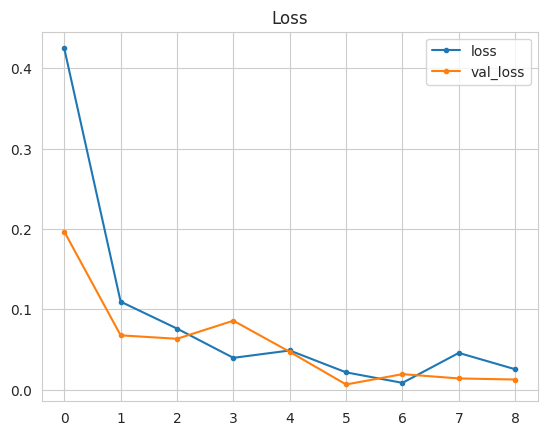

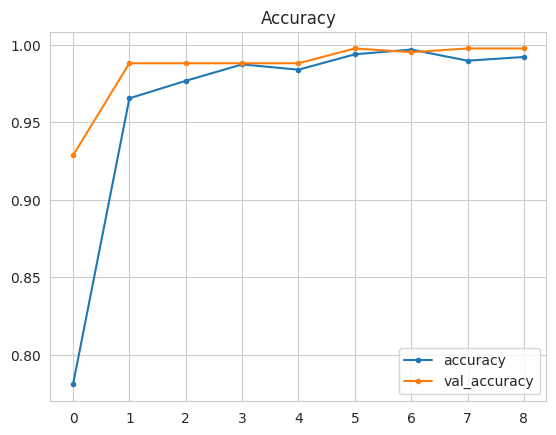

In [34]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

## Evaluate the output 

 - Load the saved model

In [35]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detection_model.h5')

 - Evaluate the model using the test set

In [36]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 40s 928ms/step - loss: 6.4793e-04 - accuracy: 1.0000


 - Save the evaluation as a pickle file

In [37]:
joblib.dump(value=evaluation ,
            filename=f"outputs/v1/model_evaluation.pkl")

['outputs/v1/model_evaluation.pkl']

## Test prediction using a random image

Image shape: (256, 256), Image mode: RGB


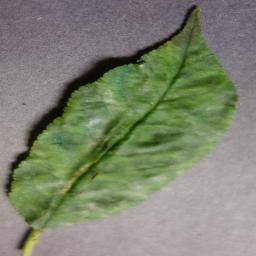

In [38]:
from tensorflow.keras.preprocessing import image

pointer = 27
label = labels[1] # select Healthy or Infected

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

 - Convert this image to an array

In [39]:
my_arr_image = image.img_to_array(pil_image)
my_arr_image = np.expand_dims(my_arr_image, axis=0)/255
print(my_arr_image.shape)

(1, 256, 256, 3)


In [40]:
pred_prob = model.predict(my_arr_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_cls =  target_map[pred_prob > 0.5]  

if pred_cls == target_map[0]: pred_prob = 1 - pred_prob

print(pred_prob)
print(pred_cls)

1.0
powdery_mildew


# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [41]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)


IndentationError: expected an indented block (1114530593.py, line 5)